In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-300-light/data300_light.csv


In [2]:
#Create df
df=pd.read_csv('/kaggle/input/data-300-light/data300_light.csv')

In [3]:
#Columns with words
new_columns=df.columns.tolist()[-300:] 
new_df=df
#Creating input data
input_data=[]
for line in new_df[new_columns].values.tolist():
    #Find max value in each line and divire all frequencies on this value
    if max(line)!=0: 
        norm_line=[x/max(line) for x in line]
    else:
        norm_line=line
        #Fill input data
    input_data.append(norm_line)

input_data=np.array(input_data)
output_data=np.array(new_df['preferences'].values.tolist())


In [4]:
#Few tests
print(len(output_data))
print(len(input_data))
print(input_data[:10])
print(output_data[:10])

13108
13108
[[0.68       0.752      0.52       ... 0.008      0.016      0.        ]
 [0.15189873 0.39556962 0.21202532 ... 0.         0.00632911 0.01265823]
 [0.05263158 0.29149798 0.1194332  ... 0.         0.00809717 0.        ]
 ...
 [0.87012987 1.         0.18181818 ... 0.         0.03896104 0.        ]
 [0.06145251 0.13687151 0.11452514 ... 0.         0.         0.        ]
 [0.11111111 1.         0.33333333 ... 0.         0.24444444 0.        ]]
[0.98180586 0.93547068 0.84612257 0.99415842 0.98447976 0.97111457
 0.97140684 0.99036453 0.97151293 0.97938144]


In [5]:
import keras as k
#Create simple keras model 
#Later I create model using GridSearchCV
model=k.Sequential()
model.add(k.layers.Dense(units=1024*6,activation="relu"))
model.add(k.layers.Dense(units=1,activation="sigmoid"))
model.compile(loss='mean_squared_error',optimizer='adamax',metrics=['accuracy'])

fit_results=model.fit(x=input_data,y=output_data,epochs=120,validation_split=.01,
                      batch_size=1
                    )
model.summary()
model.save('model_light_300')

2022-01-26 11:13:03.519724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:13:03.639795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:13:03.640477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:13:03.641552: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/120
12976/12976 [==============================] - 22s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 8.5877e-04 - val_accuracy: 0.0000e+00
Epoch 2/120
12976/12976 [==============================] - 21s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 3.3480e-04 - val_accuracy: 0.0000e+00
Epoch 3/120
12976/12976 [==============================] - 21s 2ms/step - loss: 8.3882e-04 - accuracy: 0.0000e+00 - val_loss: 2.5726e-04 - val_accuracy: 0.0000e+00
Epoch 4/120
12976/12976 [==============================] - 21s 2ms/step - loss: 5.8274e-04 - accuracy: 0.0000e+00 - val_loss: 2.8272e-04 - val_accuracy: 0.0000e+00
Epoch 5/120
12976/12976 [==============================] - 20s 2ms/step - loss: 4.6029e-04 - accuracy: 0.0000e+00 - val_loss: 1.6883e-04 - val_accuracy: 0.0000e+00
Epoch 6/120
12976/12976 [==============================] - 21s 2ms/step - loss: 4.2138e-04 - accuracy: 0.0000e+00 - val_loss: 3.2722e-04 - val_accuracy: 0.0000e+00
Epoch 7/120
12976/12976 

2022-01-26 11:56:28.753931: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


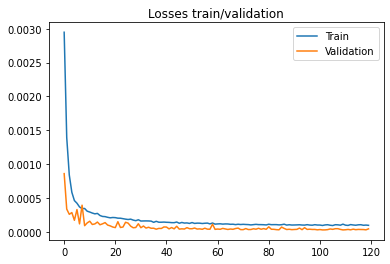

In [6]:
from matplotlib import pyplot as plt
plt.title ('Losses train/validation')
plt.plot(fit_results.history['loss'],label="Train")
plt.plot(fit_results.history['val_loss'],label="Validation")
plt.legend()
plt.show()

In [7]:
import random
#Test model
test_sample=1000
random_indexes=[random.randint(0,len(input_data)) for x in range(test_sample)]
test_data = [input_data[x] for x in random_indexes]
output=[output_data[x] for x in random_indexes] 
predicted_test=model.predict(np.array(test_data)).tolist()

n=0
for i in range(1,test_sample):
    error=(output[i]/predicted_test[i][0])*100-100
    if error>=3:
        n+=1
        print(f"reality:{output[i]}; forecast:{predicted_test[i][0]};error:{error}%")
print(f'{n} errors more than 3% in {test_sample} samples')

reality:0.2355825526932084; forecast:0.2264706790447235;error:4.023423114603489%
reality:0.5417972831765935; forecast:0.49116355180740356;error:10.308935014185366%
reality:0.9381301008161306; forecast:0.9104605913162231;error:3.0390672329822195%
reality:0.8461225734322594; forecast:0.8146350383758545;error:3.8652321067826705%
reality:0.9381301008161306; forecast:0.9104605913162231;error:3.0390672329822195%
reality:0.5281225756400311; forecast:0.49024319648742676;error:7.726650655023576%
reality:0.9166305760069294; forecast:0.8717511892318726;error:5.148187616996708%
reality:0.6731927710843374; forecast:0.6515802145004272;error:3.3169448830610406%
8 errors more than 3% in 1000 samples


In [8]:
!zip -r model_ep_100.zip ./model_light_300

  adding: model_light_300/ (stored 0%)
  adding: model_light_300/variables/ (stored 0%)
  adding: model_light_300/variables/variables.index (deflated 60%)
  adding: model_light_300/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: model_light_300/saved_model.pb (deflated 87%)
  adding: model_light_300/assets/ (stored 0%)
  adding: model_light_300/keras_metadata.pb (deflated 84%)
